In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\DELL USER\\Documents\\NAVTTC\\Excel Sheets\\insurance.csv")

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [8]:
x = df.drop(['smoker'], axis=1)
y = df['smoker']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [10]:
model = GaussianNB()

In [11]:
model.fit(x_train, y_train)

GaussianNB()

In [12]:
predicted = model.predict(x_test)

In [13]:
print("Actual Values:", y_test)
print("Predicted Values:", predicted)

Actual Values: 764     0
887     0
890     0
1293    1
259     1
       ..
701     0
672     1
1163    0
1103    1
1295    1
Name: smoker, Length: 402, dtype: int64
Predicted Values: [0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1]


In [14]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

In [15]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


In [16]:
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Metrix",cm)

Confusion Metrix [[206   0]
 [  0 196]]


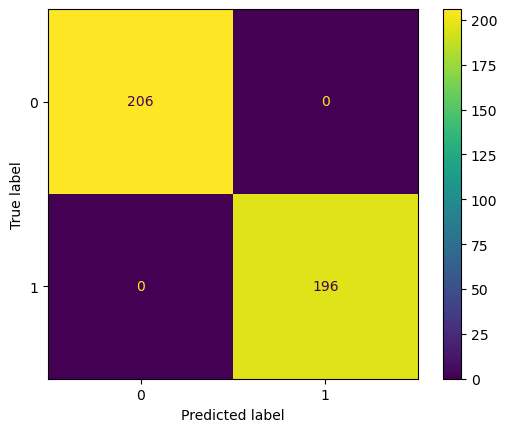

In [17]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       196

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



In [99]:
cif_gini =DecisionTreeClassifier(criterion ='gini', max_depth=3, random_state=0)
cif_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
y_pred_gini= cif_gini.predict(x_test)

In [21]:
y_pred_train_gini= cif_gini.predict(x_train)
y_pred_train_gini

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [22]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Training-set accuracy score: 1.0000


In [23]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index:{0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index:1.0000


In [24]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred_gini)
print("F1-Score",f1)

F1-Score 1.0


In [25]:
print('Training set score: {0:0.4f}'.format(cif_gini.score(x_train,y_train)))
print('Testing set score: {0:0.4f}'.format(cif_gini.score(x_test,y_test)))

Training set score: 1.0000
Testing set score: 1.0000


[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.5\nsamples = 936\nvalue = [456, 480]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 456\nvalue = [456, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 480\nvalue = [0, 480]')]

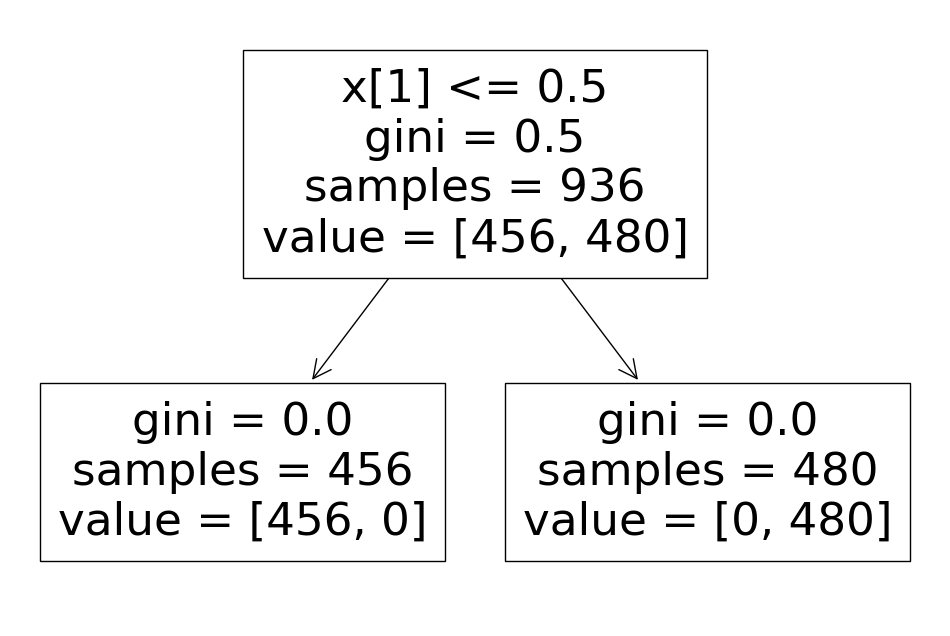

In [26]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(cif_gini.fit(x_train,y_train))

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_gini)
print("Confusion Metrix",cm)

Confusion Metrix [[206   0]
 [  0 196]]


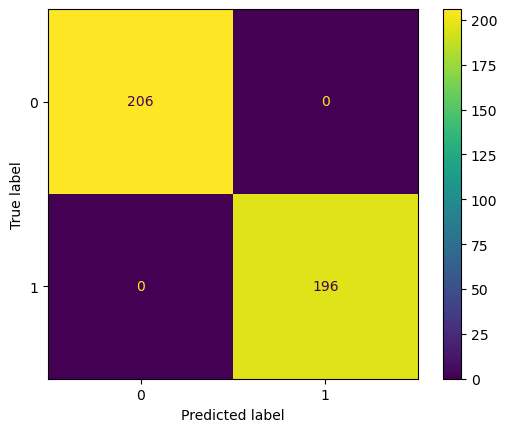

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_gini, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       196

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



In [30]:
model = KNeighborsClassifier()

In [31]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
print("Actual Values:", y_test)
print("Predicted Values:", predicted)

Actual Values: 764     0
887     0
890     0
1293    1
259     1
       ..
701     0
672     1
1163    0
1103    1
1295    1
Name: smoker, Length: 402, dtype: int64
Predicted Values: [0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1]


In [33]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Metrix",cm)

Confusion Metrix [[206   0]
 [  0 196]]


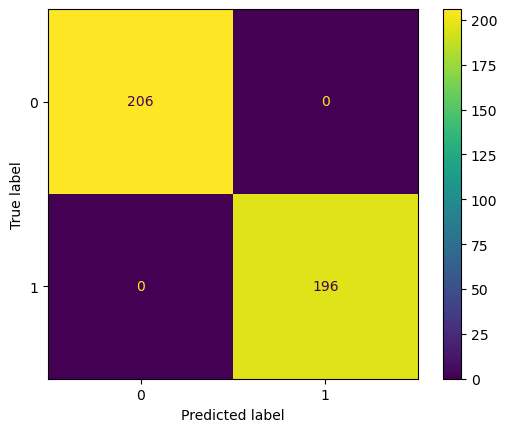

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       196

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.5348


In [49]:
# SVM Using linear kernel
linear_svc = SVC(kernel = 'linear', C=1.0)
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
print('Model accuracy score with linear kernel and c=1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and c=1.0: 0.9975


In [50]:
linear_svc = SVC(kernel = 'linear', C=100.0)
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
print('Model accuracy score with linear kernel and c=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and c=100.0: 0.9627


In [51]:
linear_svc = SVC(kernel = 'linear', C=1000.0)
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
print('Model accuracy score with linear kernel and c=1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and c=1000.0: 0.9403


In [65]:
from sklearn.metrics import recall_score
recall= recall_score(y_test, y_pred)
print("recall", recall)

recall 0.5612244897959183


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54       206
           1       0.53      0.56      0.54       196

    accuracy                           0.54       402
   macro avg       0.54      0.54      0.54       402
weighted avg       0.54      0.54      0.54       402



In [57]:
model = RandomForestClassifier()

In [58]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
print("Actual Values:", y_test)
print("Predicted Values:", predicted)

Actual Values: 764     0
887     0
890     0
1293    1
259     1
       ..
701     0
672     1
1163    0
1103    1
1295    1
Name: smoker, Length: 402, dtype: int64
Predicted Values: [0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1]


In [60]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


In [61]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Metrix",cm)

Confusion Metrix [[108  98]
 [ 86 110]]


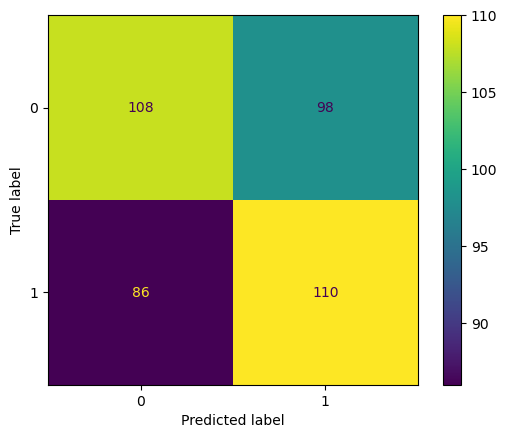

In [62]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [64]:
from sklearn.metrics import recall_score
recall= recall_score(y_test, y_pred)
print("recall", recall)

recall 0.5612244897959183


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54       206
           1       0.53      0.56      0.54       196

    accuracy                           0.54       402
   macro avg       0.54      0.54      0.54       402
weighted avg       0.54      0.54      0.54       402



In [69]:
from scipy.stats import skew 
from scipy.stats import kurtosis
import seaborn as sns

x = skew(df)
print("Skewness value is",x)
y = kurtosis(df)
print("Kurtosis value is",y)

Skewness value is [ 0.05561008 -0.0209279   0.28372857  0.93732812 -0.0209279  -0.03805778
  1.51417971]
Kurtosis value is [-1.24492068 -1.99956202 -0.05502311  0.19721743 -1.99956202 -1.32722658
  1.59582136]


In [72]:
import numpy 
x = numpy.mean(df)
print(x)

1906.2733948066411


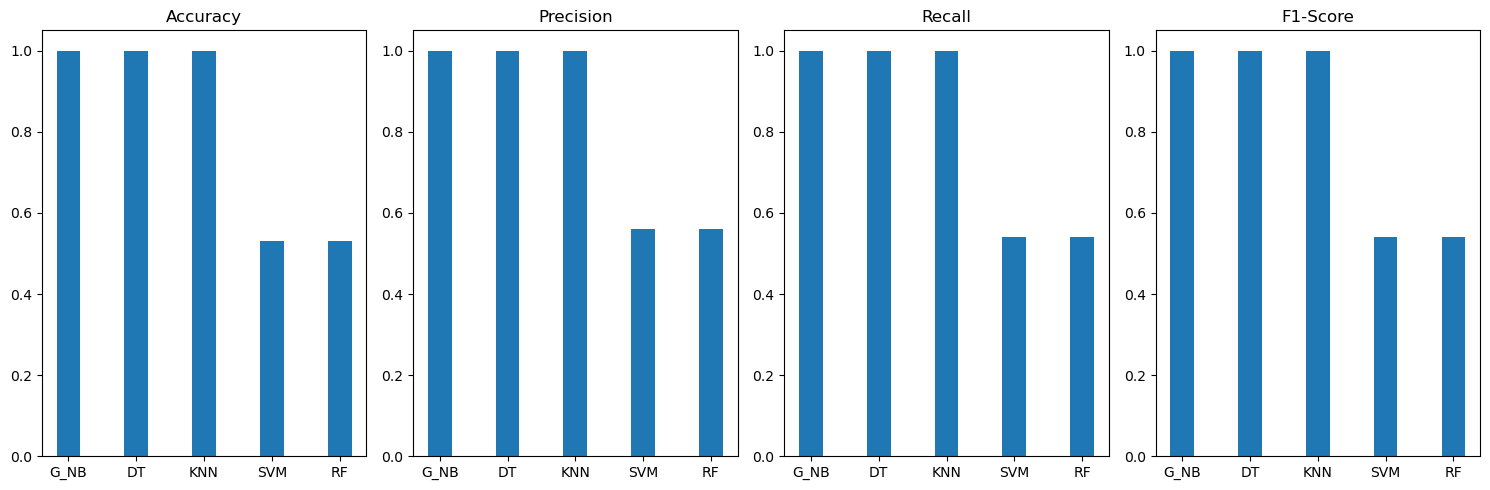

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting (example values; replace with your actual values)
classifiers = ['G_NB', 'DT','KNN',  'SVM', 'RF']
accuracy = [1.00, 1.00, 1.00, 0.53, 0.53]
precision = [1.00, 1.00, 1.00, 0.56, 0.56]
f1_score = [1.00, 1.00, 1.00, 0.54, 0.54]
recall = [1.00, 1.00, 1.00, 0.54, 0.54]

# Number of classifiers
x = np.arange(len(classifiers))

# Width of the bars
width = 0.35

# Creating subplots
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Plotting accuracy
ax[0].bar(x, accuracy, width)
ax[0].set_title('Accuracy')
ax[0].set_xticks(x)
ax[0].set_xticklabels(classifiers)

# Plotting Precision
ax[1].bar(x, precision, width)
ax[1].set_title('Precision')
ax[1].set_xticks(x)
ax[1].set_xticklabels(classifiers)

# Plotting Recall
ax[2].bar(x, f1_measure, width)
ax[2].set_title('Recall')
ax[2].set_xticks(x)
ax[2].set_xticklabels(classifiers)

# Plotting F1-Score
ax[3].bar(x, f1_score, width)
ax[3].set_title('F1-Score')
ax[3].set_xticks(x)
ax[3].set_xticklabels(classifiers)

# Adjust layout
plt.tight_layout()
plt.show()